<a href="https://colab.research.google.com/github/NEPatriots-Coder/DataScienceProjects/blob/main/Starbucks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
df = pd.read_csv("/content/drive/MyDrive/DataFiles/starbucks.csv")

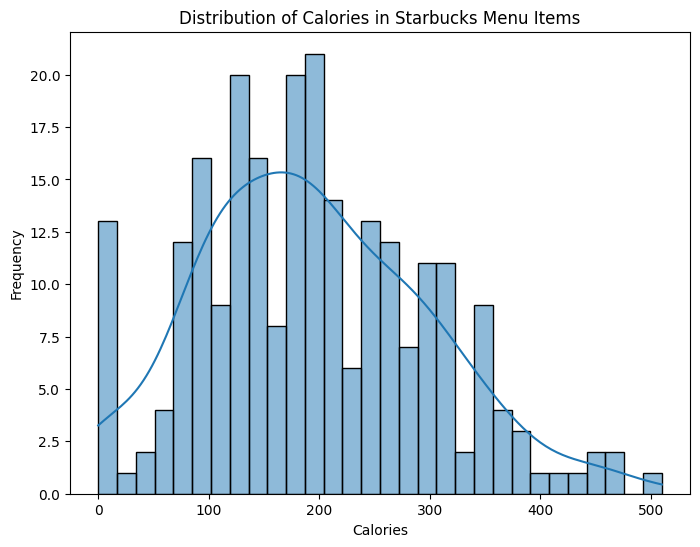

In [4]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Calories'], bins=30, kde=True)
plt.title('Distribution of Calories in Starbucks Menu Items')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

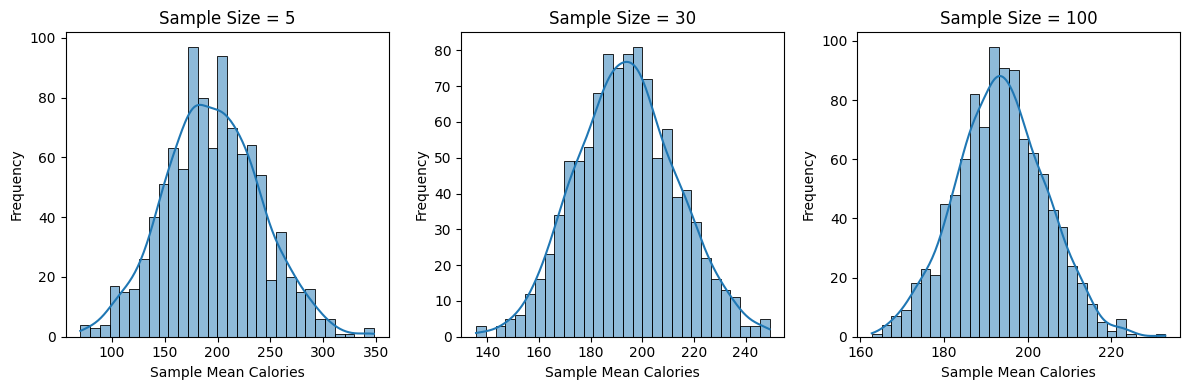

In [5]:
# Function to calculate sample means
def sample_means(data, sample_size, num_samples):
    means = []
    for _ in range(num_samples):
        sample = np.random.choice(data, size=sample_size, replace=True)
        means.append(np.mean(sample))
    return means

# Generate sample means for different sample sizes
calories = df['Calories'].dropna()
sample_sizes = [5, 30, 100]
num_samples = 1000

plt.figure(figsize=(12, 4))
for i, size in enumerate(sample_sizes, 1):
    means = sample_means(calories, size, num_samples)
    plt.subplot(1, 3, i)
    sns.histplot(means, bins=30, kde=True)
    plt.title(f'Sample Size = {size}')
    plt.xlabel('Sample Mean Calories')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Let's explore whether sugar content predicts calories

In [12]:
df.rename(columns={
    ' Total Fat (g)': 'Total Fat',
    'Trans Fat (g) ': 'Trans Fat',
    'Saturated Fat (g)': 'Saturated Fat',
    ' Sodium (mg)': 'Sodium',
    ' Total Carbohydrates (g) ': 'Total Carbohydrates',
    'Cholesterol (mg)': 'Cholesterol',
    ' Dietary Fibre (g)': 'Dietary Fibre',
    ' Sugars (g)': 'Sugars',
    ' Protein (g) ': 'Protein',
    'Vitamin A (% DV) ': 'Vitamin A',
    'Vitamin C (% DV)': 'Vitamin C',
    ' Calcium (% DV) ': 'Calcium',
    'Iron (% DV) ': 'Iron',
    'Caffeine (mg)': 'Caffeine'
}, inplace=True)
display(df.columns)

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       'Total Fat', 'Trans Fat', 'Saturated Fat', 'Sodium',
       'Total Carbohydrates', 'Cholesterol', 'Dietary Fibre', 'Sugars',
       'Protein', 'Vitamin A', 'Vitamin C', 'Calcium', 'Iron', 'Caffeine'],
      dtype='object')

In [13]:
df.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       'Total Fat', 'Trans Fat', 'Saturated Fat', 'Sodium',
       'Total Carbohydrates', 'Cholesterol', 'Dietary Fibre', 'Sugars',
       'Protein', 'Vitamin A', 'Vitamin C', 'Calcium', 'Iron', 'Caffeine'],
      dtype='object')

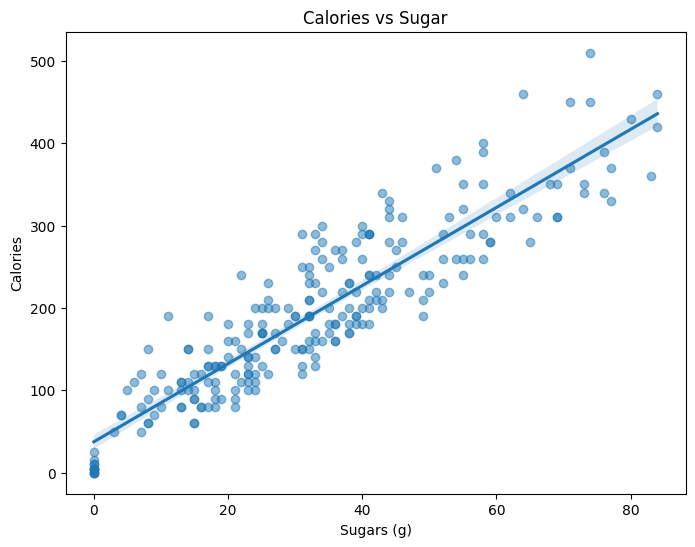

In [14]:
plt.figure(figsize=(8,6))
sns.regplot(x='Sugars', y='Calories', data=df, scatter_kws={'alpha':0.5})
plt.title('Calories vs Sugar')
plt.xlabel('Sugars (g)')
plt.ylabel('Calories')
plt.show()

In [19]:
from scipy.stats import linregress
sugar = df['Sugars'].dropna()
calories = df['Calories'].dropna()
slope, intercept, r_value, p_value, std_err = linregress(sugar, calories)
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared: {r_value**2:.2f}")
print(f"P-value: {p_value:.4f}")

Slope: 4.74
Intercept: 37.54
R-squared: 0.83
P-value: 0.0000


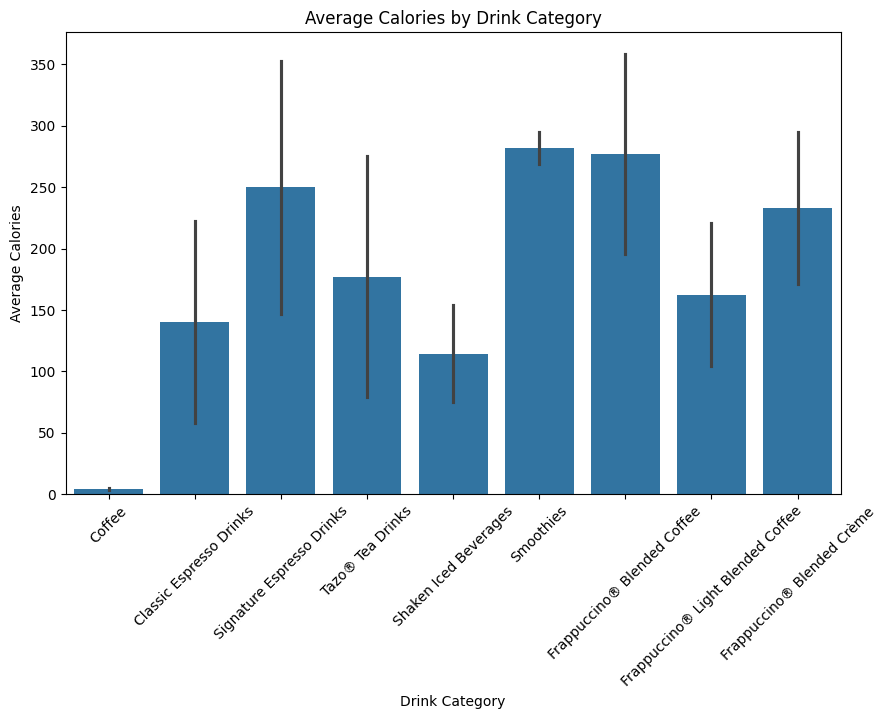

In [22]:
# Bar chart of average calories by category
plt.figure(figsize=(10, 6))
sns.barplot(x='Beverage_category', y='Calories', data=df, errorbar='sd')
plt.title('Average Calories by Drink Category')
plt.xlabel('Drink Category')
plt.ylabel('Average Calories')
plt.xticks(rotation=45)
plt.show()

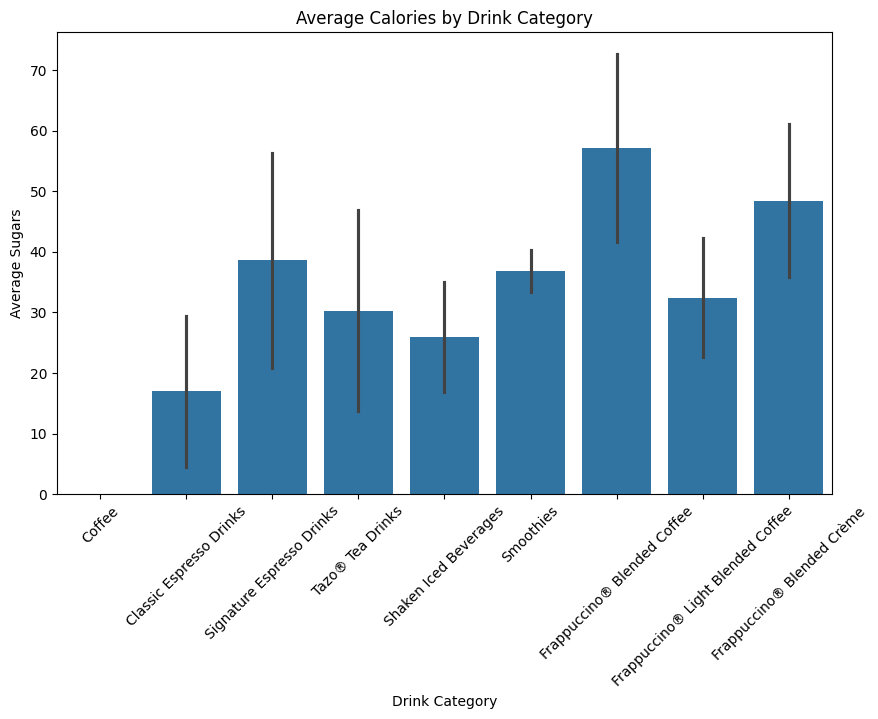

In [24]:
# Bar chart of average sugar by category
plt.figure(figsize=(10, 6))
sns.barplot(x='Beverage_category', y='Sugars', data=df, errorbar='sd')
plt.title('Average Calories by Drink Category')
plt.xlabel('Drink Category')
plt.ylabel('Average Sugars')
plt.xticks(rotation=45)
plt.show()